Classer si un nombre de la suite Zn est premier ou non

In [2]:
import csv
import math

def is_prime(n):
    if n <= 1:
        return False
    if n == 2 or n == 3:
        return True
    if n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True

def get_mod(n, m):
    return n % m

def generate_data(n):
    data = []
    for i in range(1, n + 1):
        z = 3 * i + ((-1) ** i + 9) / 2
        mod5 = get_mod(z, 5)
        mod7 = get_mod(z, 7)
        mod9 = get_mod(z, 9)
        prime = int(is_prime(z))
        data.append((z, mod5, mod7, mod9, prime))
    return data

data = generate_data(100)

with open('data.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['z', 'mod5', 'mod7', 'mod9', 'isprime'])
    for row in data:
        writer.writerow(row)


Génère les données de la suite Zn et les enregistre dans un fichier CSV

Zn = 3n+((-1)^n+9)/2

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data.csv")
print(df)

        z  mod5  mod7  mod9  isprime
0     7.0   2.0   0.0   7.0        1
1    11.0   1.0   4.0   2.0        1
2    13.0   3.0   6.0   4.0        1
3    17.0   2.0   3.0   8.0        1
4    19.0   4.0   5.0   1.0        1
..    ...   ...   ...   ...      ...
95  293.0   3.0   6.0   5.0        1
96  295.0   0.0   1.0   7.0        0
97  299.0   4.0   5.0   2.0        0
98  301.0   1.0   0.0   4.0        0
99  305.0   0.0   4.0   8.0        0

[100 rows x 5 columns]


In [5]:
print(df.shape)
print(df.describe())

(100, 5)
               z        mod5        mod7        mod9     isprime
count  100.00000  100.000000  100.000000  100.000000  100.000000
mean   156.00000    2.000000    2.980000    4.530000    0.590000
std     87.04463    1.421338    2.014994    2.512414    0.494311
min      7.00000    0.000000    0.000000    1.000000    0.000000
25%     82.00000    1.000000    1.000000    2.000000    0.000000
50%    156.00000    2.000000    3.000000    4.500000    1.000000
75%    230.00000    3.000000    5.000000    7.000000    1.000000
max    305.00000    4.000000    6.000000    8.000000    1.000000


In [6]:

print(df['mod9'].describe())

count    100.000000
mean       4.530000
std        2.512414
min        1.000000
25%        2.000000
50%        4.500000
75%        7.000000
max        8.000000
Name: mod9, dtype: float64


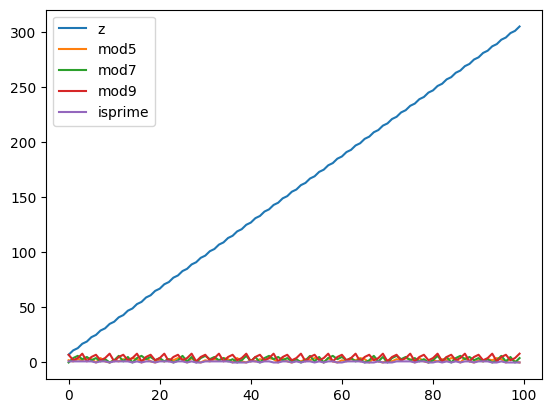

In [7]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

Créer un modèle de classification en utilisant le Naive Bayes

Importez les bibliothèques nécessaires

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Chargez les données depuis le fichier CSV:

In [9]:
data = pd.read_csv('data.csv')

Séparez les données en variables de caractéristiques (ou fonctionnalités) et variable cible:

In [10]:
X = data.drop(['z', 'isprime'], axis=1)  # fonctionnalités: mod5, mod7, mod9
y = data['isprime']  # variable cible: isprime

Divisez les données en ensembles de formation et de test:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

Créez le modèle Naive Bayes:

In [12]:
nb = GaussianNB()

Entraînez le modèle sur l'ensemble de formation:

In [13]:
nb.fit(X_train, y_train)

GaussianNB()

Effectuez des prédictions sur l'ensemble de test:

In [14]:
y_pred = nb.predict(X_test)

Évaluez les performances du modèle en utilisant l'exactitude (accuracy) :

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


 tester le modèle sur un nombre de la suite Zn:

In [16]:
import numpy as np

for i in range(1213,1220):
     z = 3 * i + ((-1) ** i + 9) / 2
     X_new = np.array([[z%5, z%7, z%9]])
     # Effectuer la prédiction
     y_new = nb.predict(X_new)
     # Afficher la prédiction
     print(f"{z} : prédiction  {'premier' if y_new[0] == 1 else 'non premier'} | exact {'premier' if is_prime(z) else 'non premier'}")


3643.0 : prédiction  premier | exact premier
3647.0 : prédiction  non premier | exact non premier
3649.0 : prédiction  premier | exact non premier
3653.0 : prédiction  premier | exact non premier
3655.0 : prédiction  non premier | exact non premier
3659.0 : prédiction  premier | exact premier
3661.0 : prédiction  non premier | exact non premier


c:\Users\ayoub\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\ayoub\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\ayoub\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\ayoub\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\ayoub\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with f

In [17]:
# Chercher le meilleur score avec la validation croisée
from sklearn.model_selection import cross_val_score


scores = cross_val_score(nb, X, y, cv=5)

# Afficher les scores de validation croisée
print(f"Scores de validation croisée: {scores}")

# Afficher le score moyen
print(f"Score moyen: {np.mean(scores)}")

Scores de validation croisée: [0.95 0.9  0.85 0.65 0.75]
Score moyen: 0.82


11


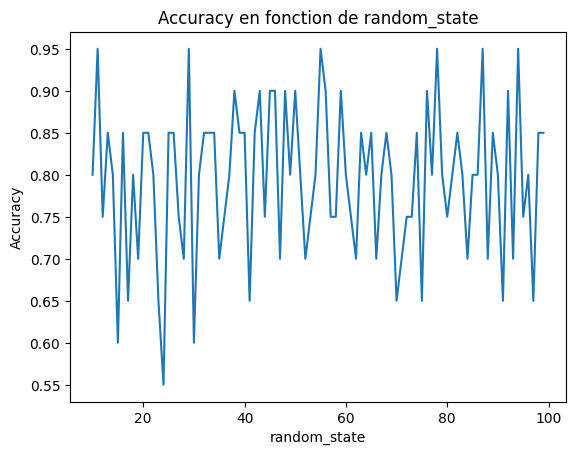

In [18]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')
X = data.drop(['z', 'isprime'], axis=1)
y = data['isprime']

random_states = np.arange(10, 100, 1) # Valeurs de random_state à tester
accuracies = []
max= 0
m=1
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    if accuracy>max:
        max = accuracy
        m=random_state

# Tracer la précision en fonction de random_state
print(m)
plt.plot(random_states, accuracies)
plt.xlabel("random_state")
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction de random_state")
plt.show()


In [19]:
!jupyter nbconvert --to markdown primeml.ipynb

[NbConvertApp] Converting notebook primeml.ipynb to markdown
C:\Users\ayoub\AppData\Local\Programs\Python\Python311\Lib\site-packages\nbformat\__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)
[NbConvertApp] Support files will be in primeml_files\
[NbConvertApp] Making directory primeml_files
[NbConvertApp] Making directory primeml_files
[NbConvertApp] Writing 12514 bytes to primeml.md
